In [24]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

<h1>Telco Churn Rate</h1>
<br><br>
The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

### The objective of this notebook is to study the nature of the data, understand the information for its correct transformation and store the data in a fully numerical dataframe to work on it.

In [25]:
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [26]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We analyse and detect the columns to make the most optimal conversion for the model.
<br><br>
- customerID has to be removed for the model
- gender we change we can make a dummies
- Partner change to True/False
- Dependents change to True/False
- PhoneService change to True/False
- MultipleLines we change to dummies
- InternetService we change to dummies
- OnlineSecurity changed to dummies
- OnlineBackup we set to dummies
- DeviceProtection we change to dummies
- TechSupport we switch to dummies
- StreamingTV we change to dummies
- StreamingMovies we change to dummies
- Contract we use an ordinal encoding
- PaperlessBilling True/False
- PaymentMethod we change to dummies (4 different ones)
- Churn True/False

In [28]:
# One-Hot Encoding with the columns we have selected.
columns_to_encode = [
    'gender',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaymentMethod'
]

df_num = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [29]:
# Change columns with Yes/No to True/False

columns_to_boolean = [
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling',
    'Churn'
]

for col in columns_to_boolean:
    df_num[col] = df_num[col].map({'Yes': True, 'No': False})


In [30]:
# In this case we use ordinal coding because the categories have a logical order.
contract_mapping = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}

df_num['Contract'] = df_num['Contract'].map(contract_mapping)
print(df_num['Contract'].unique())

[0 1 2]


In [31]:
df_num['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [32]:
# Convert TotalCharges column to float
df_num['TotalCharges'] = pd.to_numeric(df_num['TotalCharges'], errors='coerce')

In [33]:
# Remove the ‘customerID’ column
df_num.drop(columns=['customerID'], inplace=True)

In [34]:
df_num

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,True,False,1,False,0,True,29.85,29.85,False,...,False,False,False,False,False,False,False,False,True,False
1,0,False,False,34,True,1,False,56.95,1889.50,False,...,True,False,False,False,False,False,False,False,False,True
2,0,False,False,2,True,0,True,53.85,108.15,True,...,False,False,False,False,False,False,False,False,False,True
3,0,False,False,45,False,1,False,42.30,1840.75,False,...,True,False,True,False,False,False,False,False,False,False
4,0,False,False,2,True,0,True,70.70,151.65,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,True,True,24,True,1,True,84.80,1990.50,False,...,True,False,True,False,True,False,True,False,False,True
7039,0,True,True,72,True,1,True,103.20,7362.90,False,...,True,False,False,False,True,False,True,True,False,False
7040,0,True,True,11,False,0,True,29.60,346.45,False,...,False,False,False,False,False,False,False,False,True,False
7041,1,True,False,4,True,0,True,74.40,306.60,True,...,False,False,False,False,False,False,False,False,False,True


In [35]:
print(df_num.isnull().sum())

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
Contract                                  0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                 

In [36]:
# We change the missing values to the mean
df_num = df_num.fillna(df_num.median())

In [37]:
# Convert Boolean columns to 1 and 0 in the dataframe df_num
df_num = df_num.copy() 
boolean_columns = df_num.select_dtypes(include=['bool']).columns 

df_num[boolean_columns] = df_num[boolean_columns].astype(int)
print(df_num.dtypes)

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
Contract                                   int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes

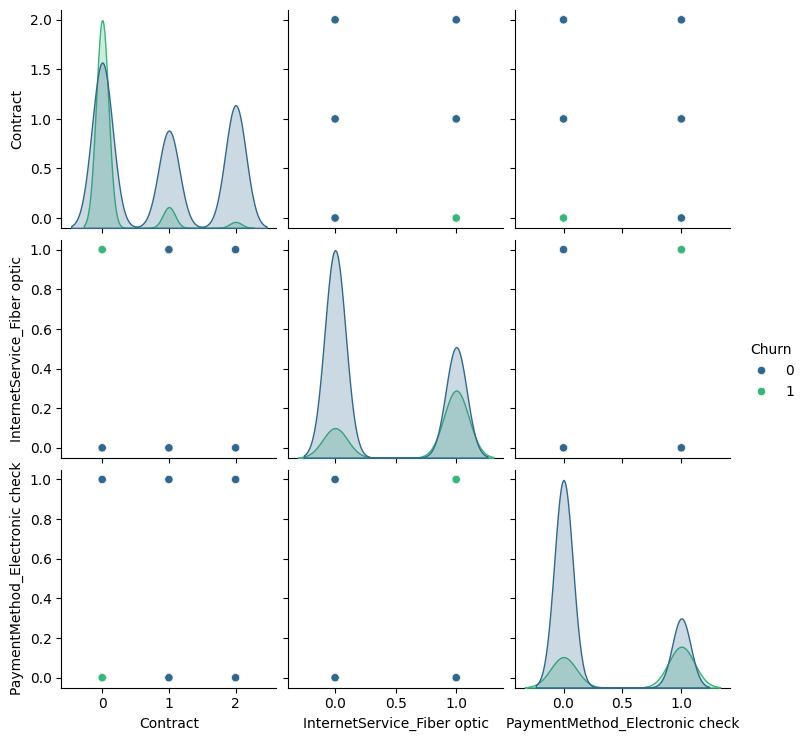

In [38]:
# We create a pairplot to observe the distribution of the 3 main features we plan to add to the model.
selected_features = ['Contract', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'Churn']
sns.pairplot(df_num[selected_features], hue='Churn', diag_kind='kde', palette='viridis')
plt.show()

We note that the column in the Contract has 3 values, ranging from 0 to 3:
0 - Month to month contract
1 - 1 year contract
2- 2-year contract
And from what we see in the positive Churn, the contracts that are renewed month to month have a considerably higher customer leakage. 

For this reason, and so that the model has a greater detail of this data, we will change this Feature with a One-Hot Encoding.


In [39]:
# We use One Hot Encoding for the Contract colum
contract_encoded = pd.get_dummies(df_num['Contract'], prefix='Contract')
contract_encoded.columns = ['contract_MtoM', 'contract_OneYear', 'contract_TwoYear']
df_num = pd.concat([df_num.drop(columns=['Contract']), contract_encoded], axis=1)
print(df_num.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'contract_MtoM', 'contract_OneYear', 'contract_TwoYear'],
      dtype='object')


In [40]:
df_num[['contract_MtoM', 'contract_OneYear', 'contract_TwoYear']] = df_num[['contract_MtoM', 'contract_OneYear', 'contract_TwoYear']].astype(int)
print(df_num.dtypes)


SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No inter

In [45]:
# Calculate target distribution in percentages
target_distribution = df['Churn'].value_counts(normalize=True) * 100

summary_df = pd.DataFrame({
    'Percentage': target_distribution,
})

print("Distribución del Target y Suma de TotalCharges:")
print(summary_df)

Distribución del Target y Suma de TotalCharges:
       Percentage
Churn            
No      73.463013
Yes     26.536987


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

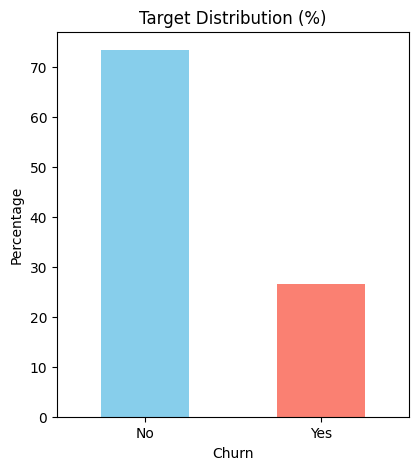

In [46]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
target_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Target Distribution (%)")
plt.ylabel("Percentage")
plt.xticks(rotation=0)


In [20]:
# Save df_num as Dataframe
df_num.to_csv('df_num.csv', index=False)